<a href="https://colab.research.google.com/github/vanditaagarwal/Logistic_Regression/blob/main/M20MA208_task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

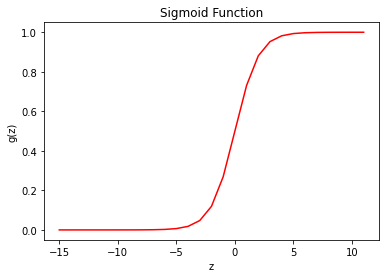

In [ ]:
# 5.1) Plot of sigmoid function
import numpy as np
import matplotlib.pyplot as plt

z=np.arange(-15,12)
g = 1/(1+np.exp(-z))

plt.plot(z, g, color = "r")
#plt.plot(z=0, g, color = "b")

# putting labels
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Sigmoid Function')

# function to show plot
plt.show()

In [ ]:
# 5.2) As my roll number is M20MA208, so I am doing experiment 1.

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model


In [ ]:
# Loading Data
data=pd.read_csv('/content/glass.data', header=None)
data

# 1=window glass, 0=non-window glass

df=pd.DataFrame(data)

#Giving names to the columns
df.columns=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]
df

#Class=[]
#for i in [len(data)]:
#  if df["K"] == (1 | 2 | 3 | 4):
#    Class[i]="+"
#  else:
#    Class[i]="-"

#data['Classification']=Class

#data

,A,B,C,D,E,F,G,H,I,J,K
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
# Initializing x and y

x=df.drop(['K'],axis=1)
x.columns

#Assigning 1 and 0 to window and non-window glasses respectively
df['Window Glass'] = np.where((df['K'] == 1 | 2 | 3 | 4), 0, 1)

y=df['Window Glass'].values

df

,A,B,C,D,E,F,G,H,I,J,K,Window Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,0


In [ ]:
# Min-Max Normalization

x = (x - np.min(x))/(np.max(x)-np.min(x)).values

#or
#from sklearn.preprocessing import MinMaxScaler
#for column in x.columns:
#  x[column] = ((x[column] - x[column].min()) / (x[column].max() - x[column].min()))


In [ ]:
# Train-Test Split(60:40)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=15)

x_train

,A,B,C,D,E,F,G,H,I,J
151,0.708920,0.444249,0.539850,0.868597,0.168224,0.301786,0.000000,0.377323,0.000000,0.000000
63,0.295775,0.488147,0.517293,0.848552,0.152648,0.275000,0.000000,0.395911,0.000000,0.000000
149,0.699531,0.231782,0.215038,0.783964,0.330218,0.550000,0.091787,0.288104,0.000000,0.000000
178,0.835681,0.313433,0.560902,0.498886,0.414330,0.458929,0.000000,0.355948,0.000000,0.000000
106,0.497653,0.882353,0.000000,0.000000,0.563863,0.000000,0.093398,0.731413,1.000000,0.549020
...,...,...,...,...,...,...,...,...,...,...
128,0.600939,0.418349,0.424060,0.465479,0.429907,0.423214,0.085346,0.384758,0.085714,0.333333
119,0.558685,0.235733,0.425564,0.795100,0.367601,0.471429,0.103060,0.235130,0.000000,0.000000
133,0.624413,0.300702,0.448120,0.875278,0.389408,0.357143,0.086957,0.258364,0.000000,0.294118
140,0.657277,0.252414,0.390977,0.788419,0.411215,0.487500,0.109501,0.249071,0.000000,0.000000


In [ ]:
# Classifying Window glass and  Non-window glass

from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression(random_state=15)

logreg.fit(x_train,y_train)



LogisticRegression(random_state=15)

In [ ]:
#Predicting on test data

y_pred=logreg.predict(x_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
# Testing for accuracy

print("training accuracy:",logreg.score(x_train,y_train))
print("test accuracy:",logreg.score(x_test,y_test))


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

training accuracy: 0.9765625
test accuracy: 0.9418604651162791
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.95      0.99      0.97        73

    accuracy                           0.94        86
   macro avg       0.92      0.84      0.87        86
weighted avg       0.94      0.94      0.94        86



In [ ]:
# 5.3) Logistic Regression Model


In [ ]:
# Implementing logistic regression

class LogRegression:
    def __init__(self, lr=0.00001, itr=10000):
        self.lr = lr
        self.itr = itr
        self.w = None
        self.b = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, Y):
        samples, features = X.shape

        self.w = np.zeros(features).astype(float)
        self.b = 0

        # gradient descent for optimization
        for __ in range(self.itr):
            # approximate y with linear combination of weights and x, plus bias
            l_model = np.dot(X, self.w) + self.b

            # apply sigmoid function
            y_predicted = self._sigmoid(l_model)

            #gradient calculation
            dw = (2 / samples) * np.dot(X.T, (y_predicted - Y))
            db = (2 / samples) * np.sum(y_predicted - Y)

            #parameters updation
            self.w -= self.lr * dw
            self.b -= self.lr * db
            checkw = self.w
            checkp = self.b

        self.w =checkw
        self.b = checkp
    def predict(self, X):
        l_model = np.dot(X, self.w) + self.b
        y_predict = self._sigmoid(l_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predict]
        return np.array(y_predicted_class)

In [ ]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [ ]:
#Predicting output on test data using Model

logreg1= LogRegression(lr=0.001, itr=1000)
logreg1.fit(x_train,y_train)

y1_pred=logreg1.predict(x_test)
y1_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Accuracy

print("Logistic Regression test accuracy:", accuracy(y_test, y1_pred))




Logistic Regression test accuracy: 0.8488372093023255


In [ ]:
# 5.4) Plotting confusion matric and roc-auc curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


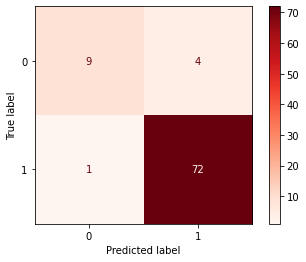

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix,roc_curve,auc

conf=plot_confusion_matrix(logreg,x_test,y_test,cmap='Reds',values_format='.2g')

In [ ]:
conf.confusion_matrix

array([[ 9,  4],
       [ 1, 72]])

Text(0, 0.5, 'True Postive rate')

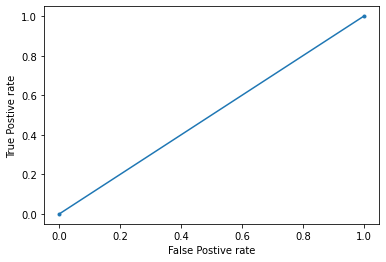

In [ ]:
lg_fpr,lg_tpr,threshold=roc_curve(y_test,y_pred)
auc_lg=auc(lg_fpr,lg_tpr)
plt.plot(lg_fpr,lg_tpr,marker='.', label='Logistic(auc=%0.3f)' %auc_lg)

plt.xlabel('False Postive rate')
plt.ylabel('True Postive rate')